In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Pizza_Sales.xlsx')
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
'''
Pizza_id: уникальный идентификатор каждой пиццы в наборе данных.
order_id: уникальный идентификатор каждого заказа пиццы.
Pizza_name_id: идентификатор каждого конкретного названия пиццы.
количество: количество пицц, заказанных в каждой транзакции.
order_date: дата размещения заказа на пиццу.
order_time: время размещения заказа на пиццу.
unit_price: цена одной единицы пиццы.
total_price: общая стоимость заказа пиццы, рассчитываемая как цена за единицу, умноженная на количество.
Pizza_size: Размер пиццы. (S,M,L,XL,XXL)
Pizza_category: Категория или классификация пиццы, указывающая ее тип или стиль. (Классический, Вегетарианский, Высший, Куриный)
Pizza_ingredients: список ингредиентов, используемых при приготовлении пиццы.
Pizza_name: имя или метка, присвоенная каждой конкретной пицце.
'''

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [5]:
# Пропущенных значений не наблюдается. Проверка на дубликаты.

df.duplicated().sum()

0

In [6]:
# Расширенная описательная статистика

df.describe(include='all')

C:\Users\Luther\AppData\Local\Temp\ipykernel_8280\2199058362.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
count,48620.000000,48620.000000,48620,48620.000000,48620,48620,48620.000000,48620.000000,48620,48620,48620,48620
unique,NaN,NaN,91,NaN,358,16382,NaN,NaN,5,4,32,32
top,NaN,NaN,big_meat_s,NaN,2015-11-26 00:00:00,12:32:00,NaN,NaN,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
freq,NaN,NaN,1811,NaN,261,26,NaN,NaN,18526,14579,2416,2416
first,NaN,NaN,NaN,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2015-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,24310.500000,10701.479761,NaN,1.019622,NaN,NaN,16.494132,16.821474,NaN,NaN,NaN,NaN
std,14035.529381,6180.119770,NaN,0.143077,NaN,NaN,3.621789,4.437398,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1.000000,NaN,NaN,9.750000,9.750000,NaN,NaN,NaN,NaN
25%,12155.750000,5337.000000,NaN,1.000000,NaN,NaN,12.750000,12.750000,NaN,NaN,NaN,NaN


In [7]:
# Общий доход

total_revenue = (df['total_price']).sum()
print("Total Revenue:", total_revenue)

Total Revenue: 817860.05


In [8]:
# Средняя стоимость заказа

avg_order_value = df.groupby('order_id')['total_price'].sum().mean()
print("Average Order Value:", avg_order_value)

Average Order Value: 38.30726229508162


In [9]:
# Продано пицц

total_pizzas_sold = df['quantity'].sum()
print("Total Pizzas Sold:", total_pizzas_sold)

Total Pizzas Sold: 49574


In [10]:
# Всего заказов

total_orders = len(df.groupby('order_id').count())
print("Total Orders:", total_orders)

Total Orders: 21350


In [11]:
# Среднее количество пицц в заказе

avg_pizzas_per_order = df['quantity'].sum() / total_orders
print("Average Pizzas per Order:", avg_pizzas_per_order)

Average Pizzas per Order: 2.321967213114754


In [ ]:
'''
Мы сосредоточимся на отраслевом анализе. 
Ниже приведены некоторые вопросы, которые помогут нам в обучении.

Анализ эффективности продаж:
Какова средняя цена за единицу и доход от пиццы в разных категориях?
Какова средняя цена за единицу пиццы и доход от пиццы разных размеров?
Какова средняя цена за единицу и доход от трех самых продаваемых пицц?
Сезонный анализ
В какие дни недели больше всего заказов?
В какое время происходит большинство заказов?
В каком месяце наибольший доход?
В каком сезоне самый высокий доход?
Анализ поведения клиентов
Какая пицца нравится покупателям (наиболее заказываемая пицца)?
Какую пиццу заказывают больше всего раз?
Какой размер пиццы предпочитают клиенты?
Какую категорию пиццы предпочитают клиенты?
Анализ пиццы
Пицца с наименьшей и самой высокой ценой
Количество пицц в категории
Количество пицц каждого размера
Пиццы более чем одной категории
'''

In [13]:
#АНАЛИЗ ЭФФЕКТИВНОСТИ ПРОДАЖ
#Какова средняя цена за единицу и доход от пиццы в разных категориях?

category_analysis = df.groupby('pizza_category').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_category=('unit_price', lambda x: (x * df['quantity']).sum())
).sort_values(by='revenue_per_category', ascending=False)

print("Средняя цена за единицу и доход по категориямy:\n", category_analysis)

Средняя цена за единицу и доход по категориямy:
                 average_unit_price  revenue_per_category
pizza_category                                          
Classic                  14.797490             220053.10
Supreme                  17.363229             208197.00
Chicken                  17.709408             195919.50
Veggie                   16.612639             193690.45


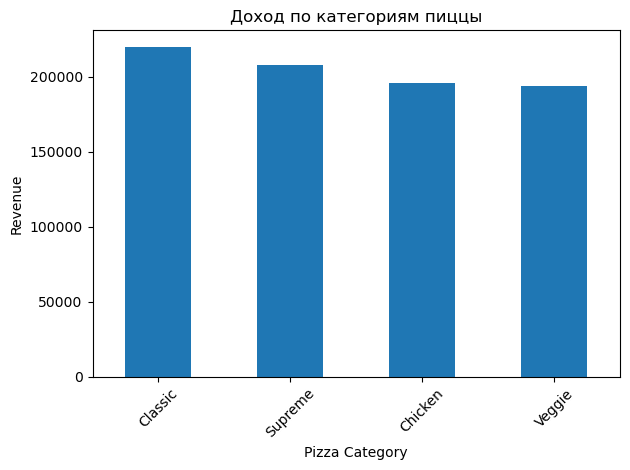

In [27]:
# Доход по категориям пиццы
category_analysis['revenue_per_category'].plot(kind='bar')
plt.xlabel('Pizza Category')
plt.ylabel('Revenue')
plt.title('Доход по категориям пиццы')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Какова средняя цена за единицу пиццы и доход от пиццы разных размеров?

size_analysis = df.groupby('pizza_size').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_size=('unit_price', lambda x: (x * df['quantity']).sum())
).sort_values(by='revenue_per_size', ascending=False)
print("Средняя цена за единицу и выручка по размеру пиццы:\n", size_analysis)

Средняя цена за единицу и выручка по размеру пиццы:
             average_unit_price  revenue_per_size
pizza_size                                      
L                    19.802553         375318.70
M                    15.951219         249382.25
S                    12.364328         178076.50
XL                   25.500000          14076.00
XXL                  35.950000           1006.60


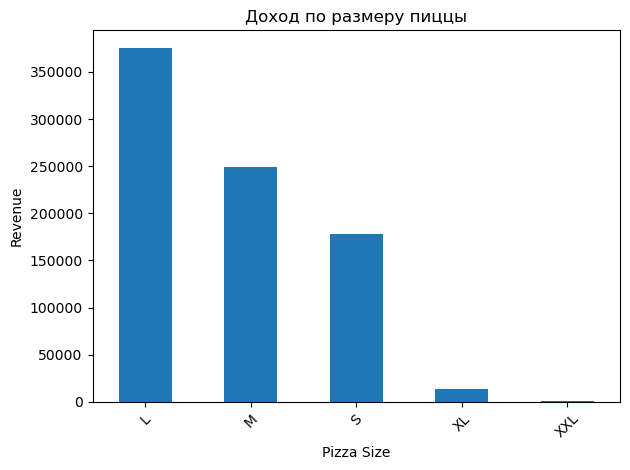

In [26]:
# Доход по размеру пиццы

size_analysis['revenue_per_size'].plot(kind='bar')
plt.xlabel('Pizza Size')
plt.ylabel('Revenue')
plt.title('Доход по размеру пиццы')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Какова средняя цена за единицу и доход от пяти самых продаваемых пицц?

top_pizza_analysis = df.groupby('pizza_name').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_pizza=('unit_price', lambda x: (x * df['quantity']).sum())
).nlargest(5, 'revenue_per_pizza')

print("Средняя цена за единицу и выручка топ-5 пицц:\n", top_pizza_analysis)

Средняя цена за единицу и выручка топ-5 пицц:
                               average_unit_price  revenue_per_pizza
pizza_name                                                         
The Thai Chicken Pizza                 18.286069           43434.25
The Barbecue Chicken Pizza             17.572934           42768.00
The California Chicken Pizza           17.448523           41409.50
The Classic Deluxe Pizza               15.575952           38180.50
The Spicy Italian Pizza                18.104663           34831.25


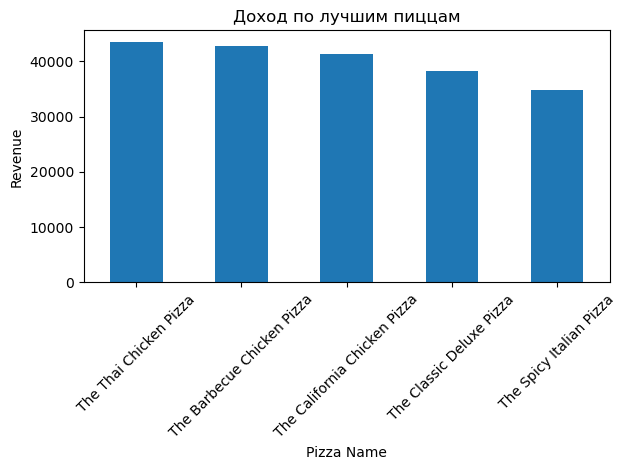

In [25]:
# Доход по лучшим пиццам
top_pizza_analysis['revenue_per_pizza'].plot(kind='bar')
plt.xlabel('Pizza Name')
plt.ylabel('Revenue')
plt.title('Доход по лучшим пиццам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
'''
СЕЗОННЫЙ АНАЛИЗ:
В какие дни недели больше всего заказов?
'''

In [22]:
df['day_of_week'] = pd.to_datetime(df['order_date']).dt.strftime('%A')
day_of_week_analysis = df.groupby('day_of_week')['order_id'].count().sort_values(ascending=False)
print("Highest Number of Orders by Day of Week:\n", day_of_week_analysis)

Highest Number of Orders by Day of Week:
 day_of_week
Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: order_id, dtype: int64


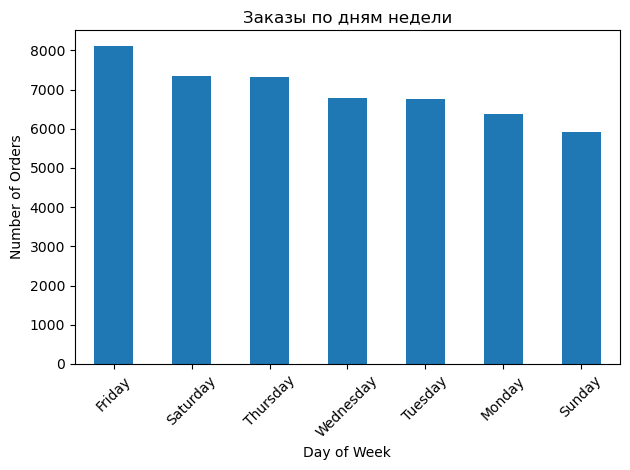

In [24]:
# заказы по дням недели

day_of_week_analysis.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Заказы по дням недели')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# В какое время происходит большая часть заказов?

df['delivery_time'] = df['order_time'].astype('string').str.slice(0, 5) 
delivery_time_analysis = df.groupby('delivery_time')['order_id'].count().nlargest(5)
print("Most Occurring Order Times:\n", delivery_time_analysis)

Most Occurring Order Times:
 delivery_time
13:04    198
12:39    158
12:56    155
12:30    153
12:29    149
Name: order_id, dtype: int64


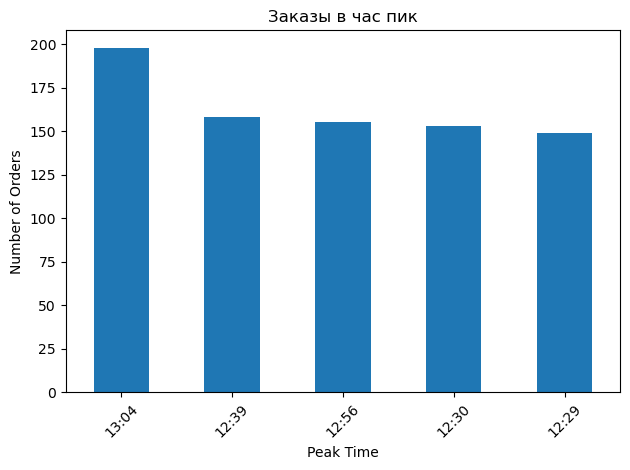

In [30]:
# Заказы в час пик
delivery_time_analysis.plot(kind='bar')
plt.xlabel('Peak Time')
plt.ylabel('Number of Orders')
plt.title('Заказы в час пик')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# В каком месяце наибольший доход?

month_revenue_analysis = df.groupby(pd.to_datetime(df['order_date']).dt.strftime('%B'))['total_price'].sum()
print("Месяцы с самым высоким доходом:\n", month_revenue_analysis)

Месяцы с самым высоким доходом:
 order_date
April        68736.80
August       68278.25
December     64701.15
February     65159.60
January      69793.30
July         72557.90
June         68230.20
March        70397.10
May          71402.75
November     70395.35
October      64027.60
September    64180.05
Name: total_price, dtype: float64


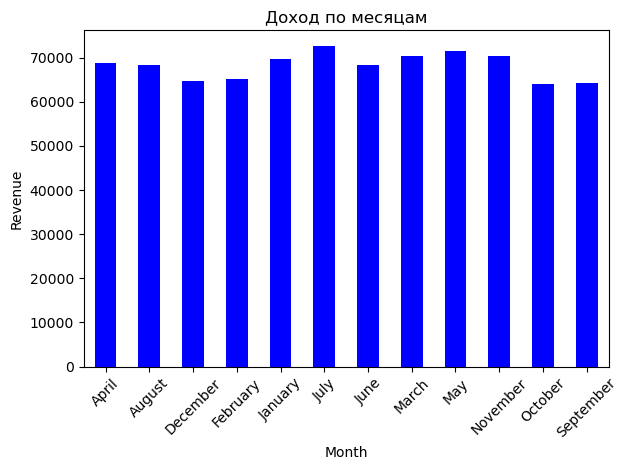

In [32]:
# Доход по месяцам

month_revenue_analysis.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Доход по месяцам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# В каком сезоне самый высокий доход?

def categorize_season(month):
    if month in ['March', 'April', 'May']:
        return 'Весна'
    elif month in ['June', 'July', 'August']:
        return 'Лето'
    elif month in ['September', 'October', 'November']:
        return 'Осень'
    else:
        return 'Зима'
    

df['season'] = pd.to_datetime(df['order_date']).dt.strftime('%B').map(categorize_season)
seasonal_revenue_analysis = df.groupby('season')['total_price'].sum()
print("Season with the Highest Revenue:\n", seasonal_revenue_analysis)

Season with the Highest Revenue:
 season
Весна    210536.65
Зима     199654.05
Лето     209066.35
Осень    198603.00
Name: total_price, dtype: float64


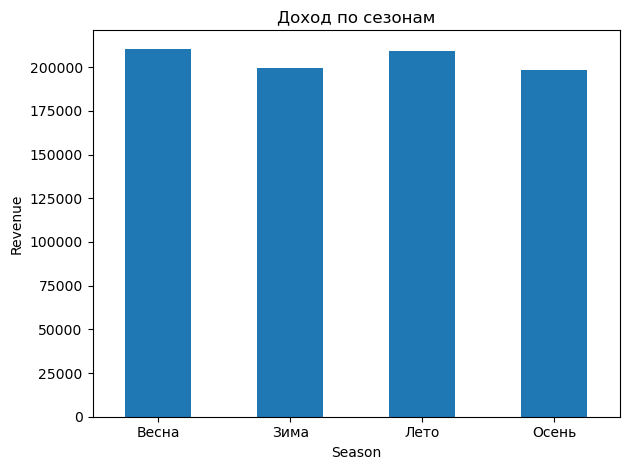

In [35]:
# Доход по сезонам

seasonal_revenue_analysis.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.title('Доход по сезонам')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
'''
АНАЛИЗ ПОВЕДЕНИЯ КЛИЕНТОВ
'''

In [38]:
# Какая пицца нравится клиентам (наиболее заказываемая пицца)?

favorite_pizza = df.groupby(['pizza_name', 'pizza_size'])['order_id'].count().idxmax()
print("Самая продаваемая пицца:", favorite_pizza)

Самая продаваемая пицца: ('The Big Meat Pizza', 'S')


In [39]:
# Какую пиццу заказывают чаще всего?

most_ordered_pizza = df.groupby('pizza_name').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(3, 'order_count')
print("Самые заказываемые пиццы:\n", most_ordered_pizza)

Самые заказываемые пиццы:
                             order_count  average_unit_price
pizza_name                                                 
The Classic Deluxe Pizza           2416           15.575952
The Barbecue Chicken Pizza         2372           17.572934
The Hawaiian Pizza                 2370           13.317194


In [45]:
# Какой размер пиццы предпочитают клиенты?

preferred_pizza_size = df.groupby('pizza_size').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(1, 'order_count')
print("Предпочтительный размер пиццы:\n", preferred_pizza_size)

Предпочтительный размер пиццы:
             order_count  average_unit_price
pizza_size                                 
L                 18526           19.802553


In [43]:
# Какую категорию пиццы предпочитают клиенты?

preferred_pizza_category = df.groupby('pizza_category').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(1, 'order_count')
print("Предпочитаемая категория пиццы:\n", preferred_pizza_category)

Предпочитаемая категория пиццы:
                 order_count  average_unit_price
pizza_category                                 
Classic               14579            14.79749


In [46]:
# АНАЛИЗ ПИЦЦЫ.
# Пицца по минимальной цене.

lowest_priced_pizza = df[['pizza_name', 'unit_price']].sort_values(by='unit_price').iloc[0]
print("Самая дешевая пицца:\n", lowest_priced_pizza)

Самая дешевая пицца:
 pizza_name    The Pepperoni Pizza
unit_price                   9.75
Name: 7636, dtype: object


In [47]:
# Самая дорогая пицца

highest_priced_pizza = df[['pizza_name', 'unit_price']].sort_values(by='unit_price', ascending=False).iloc[0]
print("Самая дорогая пицца:\n", highest_priced_pizza)

Самая дорогая пицца:
 pizza_name    The Greek Pizza
unit_price              35.95
Name: 22903, dtype: object


In [48]:
# Количество пицц в категории

pizzas_per_category = df['pizza_category'].value_counts()
print("Количество пицц в категории:\n", pizzas_per_category)

Количество пицц в категории:
 Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: pizza_category, dtype: int64


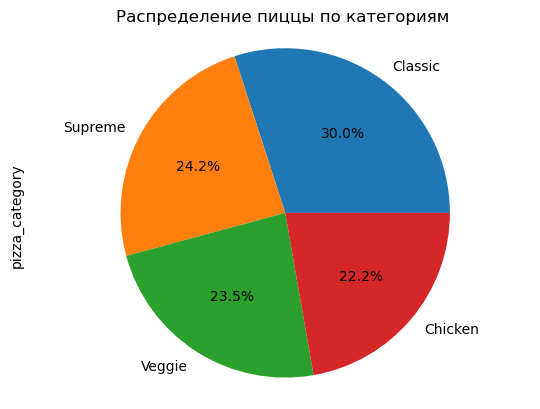

In [52]:
# Распределение пиццы по категориям

pizzas_per_category.plot(kind='pie', autopct='%1.1f%%')
plt.title('Распределение пиццы по категориям')
plt.axis('equal')
plt.show()

In [56]:
# Количество пицц каждого размера

pizzas_per_size = df['pizza_size'].value_counts()
print("Количество пицц каждого размера:\n", pizzas_per_size)

Количество пицц каждого размера:
 L      18526
M      15385
S      14137
XL       544
XXL       28
Name: pizza_size, dtype: int64


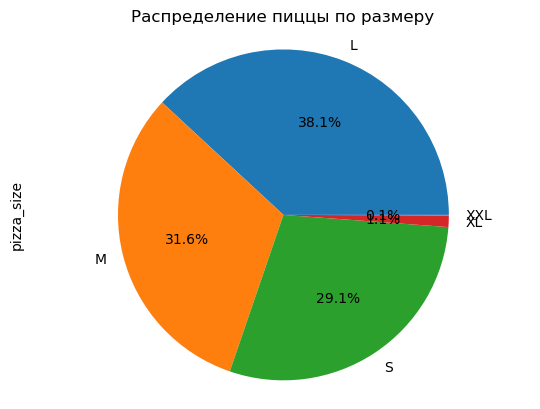

In [60]:
# Пицца по размеру

pizzas_per_size.plot(kind='pie', autopct='%1.1f%%')
plt.title('Распределение пиццы по размеру')
plt.axis('equal')
plt.show()

In [61]:
# Пиццы более чем одной категории

pizzas_with_multiple_categories = df.groupby('pizza_name').filter(lambda x: x['pizza_category'].nunique() > 1)
print("Пиццы более чем одной категории:\n", pizzas_with_multiple_categories)

Пиццы более чем одной категории:
 Empty DataFrame
Columns: [order_details_id, order_id, pizza_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name, day_of_week, delivery_time, season]
Index: []


In [ ]:
'''
Не существует пиццы с более чем одной категорией.
'''

In [ ]:
'''
Заключение

Ключевые показатели эффективности

Общий доход 817 860.
Средняя сумма, потраченная на заказ 38.30.
Всего продано 49 574 пиццы.
Всего заказов 21 350.
Среднее количество пицц на заказ 2.32.

Категории с самым высоким и самым низким доходом:

Пицца Тайская куриная, большой (L), классическая. Пицца Пицца Бри Карре, XXL, вегетарианская.

Наиболее и наименее упорядоченные категории (Наиболее и наименее закеазываемые):
Пицца Большая мясная пицца, большой (L), классическая. Пицца Бри Карре, XXL, курица.

Статистика сезонного анализа

День недели: Пятница (Выручка - 136 073/Заказов - 3 538), Воскресенье (Выручка - 99 203/Заказов - 2 624).
Месяц: Июль (Выручка - 72 557), Октябрь (Выручка - 64 027), Июль (Заказов - 1 935), Октябрь (Заказов 1 646).
Сезон: Весна (Выручка - 210 536), Осень (Выручка - 198 603), Лето (Заказы - 5 549), Осень (Заказы - 5 099).

Статистика анализа пиццы.
Пицца по самой высокой и самой низкой цене.

Пицца Пепперони/Греческая пицца

Наличие пиццы каждого размера и категории.

Размер пиццы: большой L/XXL.
Категория: «Высшая куриная».


Вот несколько интересных выводов

Заказы на завтрак. Ограниченные заказы в ранние часы позволяют предположить, что завтрак менее популярен среди пиццы, 
поскольку клиенты предпочитают альтернативные варианты утренней еды.

Обеденный пик: в период с 12:00 до 14:00 наблюдается самый высокий приток клиентов из-за обеденных перерывов, 
что подчеркивает удобство магазина для быстрого питания.

Низкая активность в воскресенье: по воскресеньям меньше всего загруженности, что указывает на то, что клиентская база 
ориентирована на будние дни, вероятно, из-за плотного графика.

Сезонные распродажи: пик продаж приходится на весну, тогда как осенью наблюдаются более низкие показатели, 
что зависит от таких факторов, как погода и культурные предпочтения.

Предпочтение больших размеров: клиенты выбирают большие пиццы, часто заказывая их группами, чтобы разделить их с семьей, 
друзьями или коллегами.

Четкая категоризация: подход «одна категория для каждой пиццы» обеспечивает четкую организацию меню 
для облегчения выбора покупателями.

Популярность большой мясной пиццы: высокий спрос на большую мясную пиццу свидетельствует о предпочтении ее мясных начинок, 
даже если это не самый высокий источник дохода.

Редкость тайской курицы: тайская куриная пицца, несмотря на ограниченную доступность, приносит высокий доход 
от единицы продукции, привлекая нишу рынка, готовую платить за ее уникальный вкус.

Широкая привлекательность классики: доминирование категории «Классика» в заказах, доходах и доступности подчеркивает 
ее вневременные и широко предпочитаемые вкусы.

Групповые заказы: среднее количество пицц 2,32 на заказ указывает на то, что магазин обслуживает собрания 
и общественные мероприятия, привлекая группы клиентов.
'''